In [41]:
# This R environment comes with all of CRAN preinstalled, as well as many other helpful packages
# The environment is defined by the kaggle/rstats docker image: https://github.com/kaggle/docker-rstats
# For example, here's several helpful packages to load in 

library(ggplot2) # Data visualization
library(readr) # CSV file I/O, e.g. the read_csv function
library(dplyr)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

system("ls ../input")

# Any results you write to the current directory are saved as output.
# na.strings=c("","-","NA") -> consider "","-","NA" as na
all.raw <- read.csv("../input/all.csv",stringsAsFactors = FALSE, header = TRUE, na.strings=c("","-","NA"))
#summary(all.raw)
#str(all.raw)
glimpse(all.raw)

#to know number of missing values in each column
findNA <- function(cell)
{
    if(is.na(cell) || cell == "NA")    
        return (1)
    else
        return (0)
}
#sapply(all.raw, findNA)
missingValues <- colSums(sapply(all.raw, is.na))
missingValues[missingValues > 0]

Observations: 590
Variables: 82
$ X                                      <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 1...
$ State                                  <chr> "AN", "AN", "Andhra", "Andhr...
$ District                               <chr> "District Andamans (01), And...
$ Persons                                <int> 314084, 42068, 2488003, 2345...
$ Males                                  <int> 170319, 22653, 1250958, 1162...
$ Females                                <int> 143765, 19415, 1237045, 1182...
$ Growth..1991...2001.                   <chr> "30.14", "7.19", "19.06", "1...
$ Rural                                  <int> 197886, 42068, 1827986, 1920...
$ Urban                                  <int> 116198, NA, NA, NA, NA, NA, ...
$ Scheduled.Caste.population             <int> NA, NA, NA, NA, NA, NA, NA, ...
$ Percentage...SC.to.total               <dbl> NA, NA, NA, NA, NA, NA, NA, ...
$ Number.of.households                   <int> 70167, 8075, 524649, 484588,...
$ Household.size..pe

Rural                                  Urban 
                                     9                                    531 
            Scheduled.Caste.population               Percentage...SC.to.total 
                                   576                                    575 
                  Number.of.households         Household.size..per.household. 
                                     3                                      3 
    Sex.ratio..females.per.1000.males.                  Sex.ratio..0.6.years. 
                                     3                                      3 
            Scheduled.Tribe.population    Percentage.to.total.population..ST. 
                                    53                                     53 
                        Total.Educated                     Data.without.level 
                                     3                                      3 
                         Below.Primary                                Primary 
                                     3                                      3 
                                Middle        Matric.Higher.Secondary.Diploma 
                                     3                                      3 
                    Graduate.and.Above                           X0...4.years 
                                     3                                      3 
                         X5...14.years                         X15...59.years 
                                     3                                      3 
    X60.years.and.above..Incl..A.N.S..                              SC.1.Name 
                                     3                                     51 
                       SC.1.Population                              SC.2.Name 
                                    13                                     64 
                       SC.2.Population                              SC.3.Name 
                                    13                                     66 
                       SC.3.Population                        Religeon.1.Name 
                                    13                                     53 
                       Religeon.2.Name                        Religeon.3.Name 
                                    53                                     53 
                       ST.1.Population                              ST.2.Name 
                                    51                                     50 
                       ST.2.Population                              ST.3.Name 
                                    54                                     50 
                       ST.3.Population                        Imp.Town.1.Name 
                                    54                                     21 
                 Imp.Town.1.Population                        Imp.Town.2.Name 
                                    14                                     97 
                 Imp.Town.2.Population                        Imp.Town.3.Name 
                                    64                                    142 
                 Imp.Town.3.Population               Total.Inhabited.Villages 
                                   108                                     12 
             Drinking.water.facilities                    Safe.Drinking.water 
                                    12                                     12 
            Electricity..Power.Supply.                 Electricity..domestic. 
                                    12                                     93 
             Electricity..Agriculture.                         Primary.school 
                                   346                                     12 
                        Middle.schools         Secondary.Sr.Secondary.schools 
                                    38                                     14 
                               College                       Medical.facility 
    

State,population,popDensity,count
AN,356152,178076,2
Andhra,71308587,3241299,22


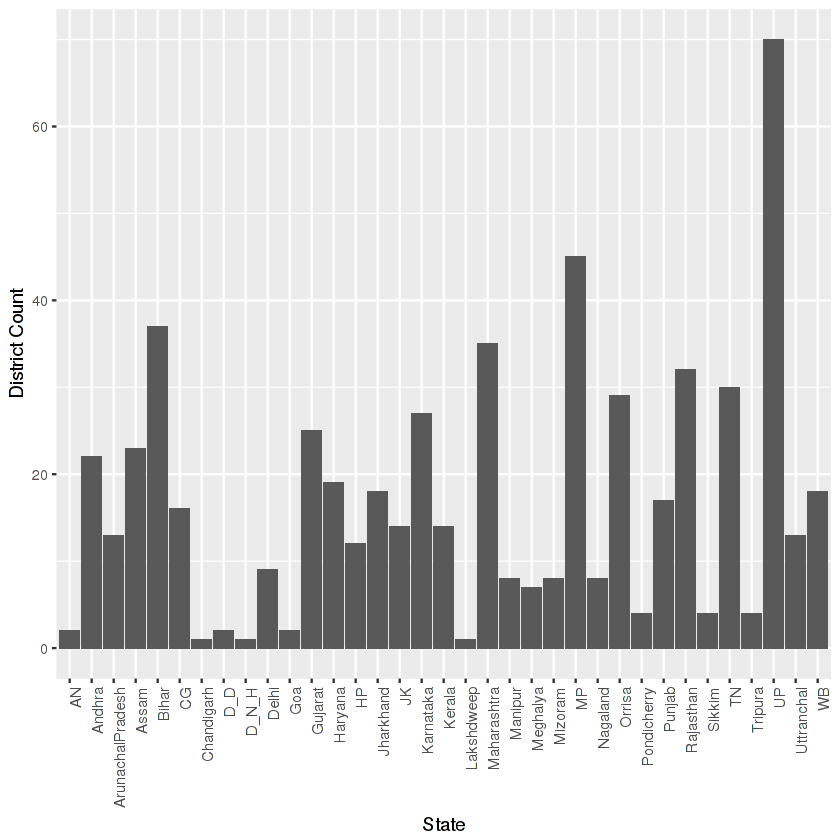

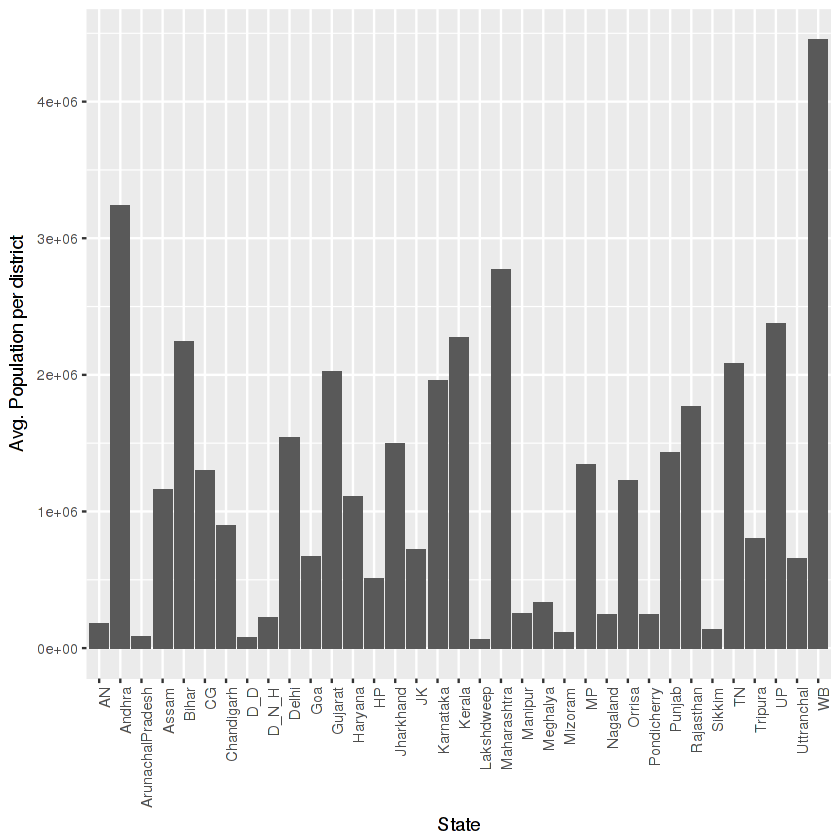

In [42]:
state.districts <- all.raw %>% group_by(State)
state.districts <- state.districts %>% summarize(population = sum(Persons)
                                                 ,popDensity = sum(Persons)/n()
                                                 ,count = n()) %>% select(State
                                                                          ,population
                                                                          ,popDensity
                                                                          ,count)
#pie()
head(state.districts, 2)

qplot(x=State, data=all.raw, geom="bar") +
ylab("District Count") +
theme(axis.text.x = element_text(angle = 90, hjust = 1))

ggplot(data=state.districts) +
geom_bar(aes(x=State, y=popDensity), stat="identity") +
#scale_y_log10() +
ylab("Avg. Population per district") +
theme(axis.text.x = element_text(angle = 90, hjust = 1))